In [3]:
import random
random.seed(123)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
import math
import time
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
pylab.rcParams.update(params)
import scipy.stats as stats

In [4]:
sns.set_style("whitegrid")
#sns.set_palette('Set1')

In [9]:
input_data = "42.FromJsontoRawstream_ANEWeaarthquake1_chile_Pre_CNNv2_Accumulate10secondsPredZERO_Ori.csv"
df = pd.read_csv("../resources/data/earthquake/Earthquake6/"+ input_data,header=None,names=['col0','col1','col2'],sep=",")

In [10]:
df.drop('col0', axis=1, inplace=True)
df.drop('col1', axis=1, inplace=True)

In [11]:
#Show for viewing
df.head(10)

col2
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0

In [12]:
#Kich thuoc du lieu
print df.shape

(19282, 1)


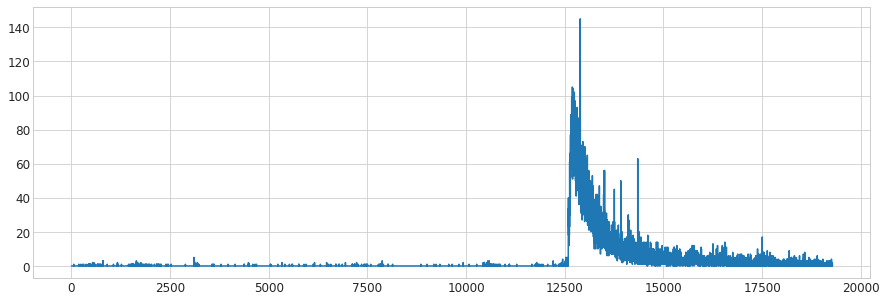

In [14]:
fig = plt.figure(figsize=(15,5))
df['col2'].plot()
plt.show()

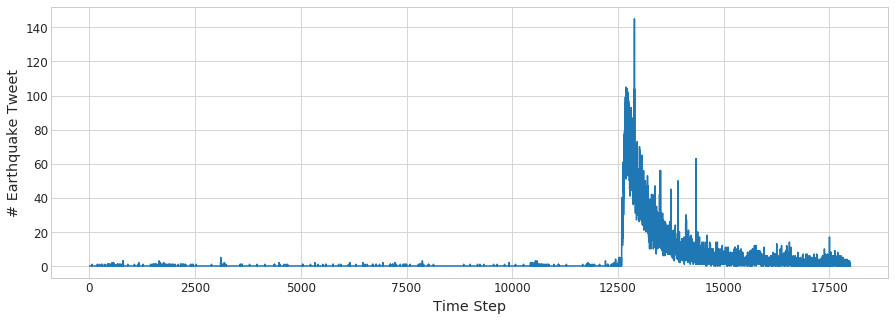

In [15]:
#tin hieu o trang thai khong co dong dat Without earthquake event situation
fig = plt.figure(figsize=(15,5))
df0 = df['col2'][0:18000]
plt.plot(df0)
plt.xlabel("Time Step")
plt.ylabel("# Earthquake Tweet")
plt.show()
pp = PdfPages("No earthquake")
pp.savefig(fig)
pp.close()

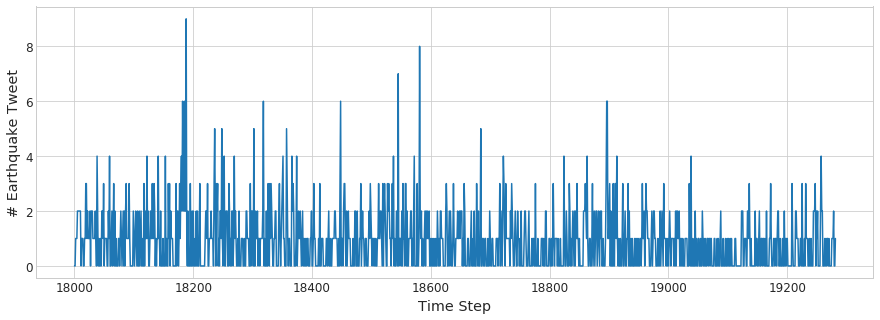

In [16]:
#isolate earthquake event [anomaly1]
fig1 = plt.figure(figsize=(15,5))
df1= df['col2'][18000:]
plt.plot(df1)
plt.xlabel("Time Step")
plt.ylabel("# Earthquake Tweet")
plt.show()
pp = PdfPages("earthquake event")
pp.savefig(fig1)
pp.close()

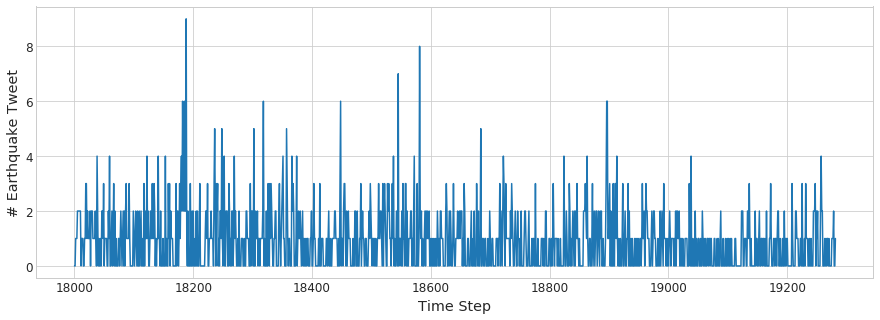

In [17]:
#isolate anomaly 2
fig2 = plt.figure(figsize=(15,5))
df2= df['col2'][18000:]
plt.plot(df2)
plt.xlabel("Time Step")
plt.ylabel("# Earthquake Tweet")
plt.show()
pp = PdfPages("earthquake event")
pp.savefig(fig2)
pp.close()

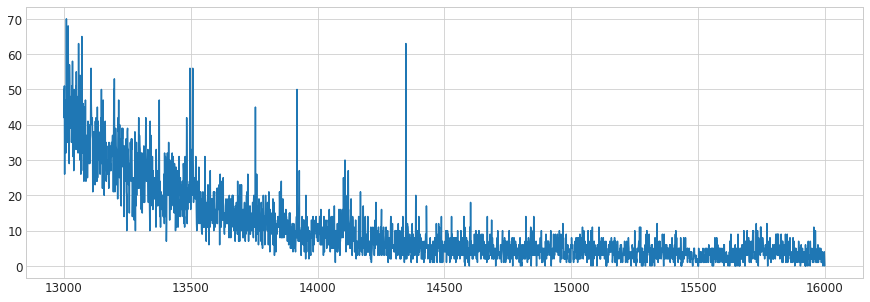

In [19]:
#isolate end sequence
fig3 = plt.figure(figsize=(15,5))
df3= df['col2'][13000:16000]
plt.plot(df3)
plt.show()

In [20]:
df['anomaly'] = 0
df.head(28750)

col2  anomaly
0         0        0
1         0        0
2         0        0
3         0        0
4         0        0
5         0        0
6         0        0
7         0        0
8         0        0
9         0        0
10        0        0
11        0        0
12        0        0
13        0        0
14        0        0
15        0        0
16        0        0
17        0        0
18        0        0
19        0        0
20        0        0
21        0        0
22        0        0
23        0        0
24        0        0
25        0        0
26        0        0
27        0        0
28        0        0
29        0        0
...     ...      ...
19252     0        0
19253     0        0
19254     0        0
19255     0        0
19256     2        0
19257     4        0
19258     2        0
19259     2        0
19260     0        0
19261     0        0
19262     0        0
19263     1        0
19264     0        0
19265     1        0
19266     0        0
19267     1        0
19268     1        0
19269     0        0
19270     1        0
19271     0        0
19272     0        0
19273     0        0
19274     0        0
19275     1        0
19276     1        0
19277     1        0
19278     2        0
19279     0        0
19280     0        0
19281     1        0

[19282 rows x 2 columns]

Size of test: 19282
Size of validation1: 1282
Size of validation2: 19282
Size of train: 18000
Total: 57846
Ratio of test: 0.333333
Ratio of validation1: 0.022162
Ratio of validation2: 0.333333
Ratio of train: 0.311171


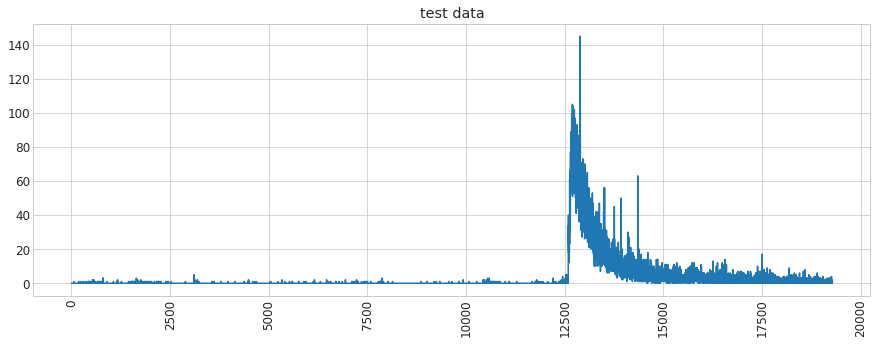

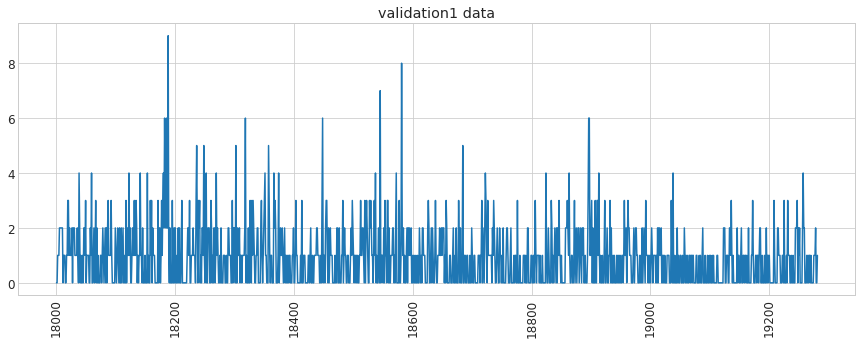

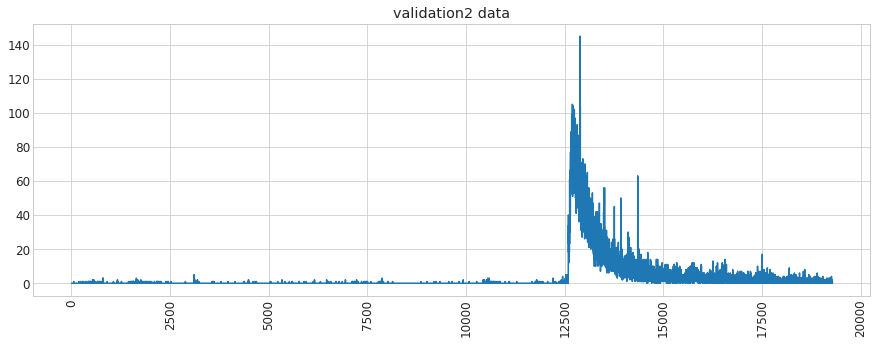

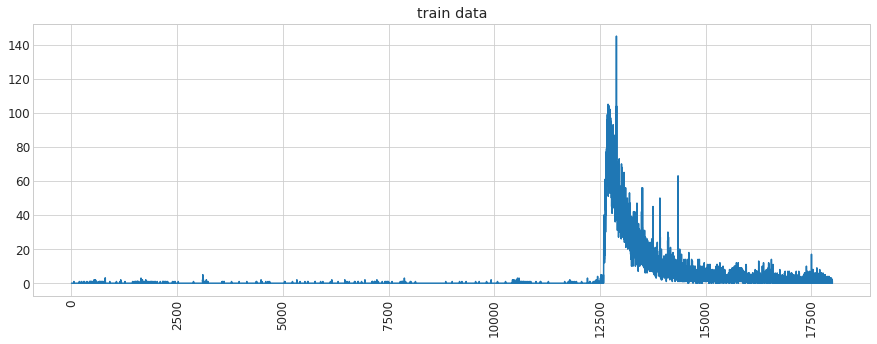

In [21]:
df_anomaly1 = df[18000:]
df_test = df

df_validation1= df[18000:]

df_not_train = df_anomaly1
df_train = df[~df.isin(df_not_train)].dropna()
df_validation2 = df_test

df_dict = {}
df_dict['train'] = df_train
df_dict['test'] = df_test
df_dict['validation1'] = df_validation1
df_dict['validation2'] = df_validation2

count = 0
for key in df_dict:
    print "Size of %s: %d"%(key,df_dict[key].shape[0])
    count += df_dict[key].shape[0]
print "Total: %d"%(count)

for key in df_dict:
    print "Ratio of %s: %f"%(key,float(df_dict[key].shape[0])/count)

    
for key in df_dict:
    df_tmp = df_dict[key]
    plt.figure()
    df_tmp['col2'].plot(figsize=(15,5))
    rows = df_tmp[df_tmp.anomaly.isin([1])].itertuples()
    for row in rows:
        print row
        plt.plot(row[0], row[1], 'r.', markersize=10.0)
    plt.xticks(rotation='vertical')
    plt.title("%s data"%(key))
    plt.show()

In [23]:
for key in df_dict:
    np.save("../resources/data/earthquake/Earthquake6/%s"%(key),df_dict[key])

In [16]:
#Earthquake detection start here
#Earthquake detection start here
#Earthquake detection start here
#Earthquake detection start here

In [24]:
data_folder = "../resources/data/earthquake/Earthquake6/"

In [25]:
#load training data
train_predictions = np.load(data_folder+"train_predictions.npy")
train_true = np.load(data_folder+"train_true.npy")
print train_predictions.shape
print train_true.shape

(17998, 1)
(17998,)


In [26]:
#load validation2 data
validation2_predictions = np.load(data_folder+"validation2_predictions.npy")
validation2_true = np.load(data_folder+"validation2_true.npy")
validation2_labels = np.load(data_folder+"validation2_labels.npy")
print np.shape(validation2_predictions)
print np.shape(validation2_true)
print np.shape(validation2_labels)
validation2_labels = np.reshape(validation2_labels,[len(validation2_labels),np.shape(validation2_labels)[1]])
print np.shape(validation2_labels)

(19280, 1)
(19280,)
(19280, 1, 1)
(19280, 1)


In [27]:
# load test data
test_predictions = np.load(data_folder+"test_predictions.npy")
test_true = np.load(data_folder+"test_true.npy")
test_labels = np.load(data_folder+"test_labels.npy")
print np.shape(test_predictions)
print np.shape(test_true)
test_labels = np.reshape(test_labels,[len(test_labels),np.shape(test_labels)[1]])
print np.shape(test_labels)

(19280, 1)
(19280,)
(19280, 1)


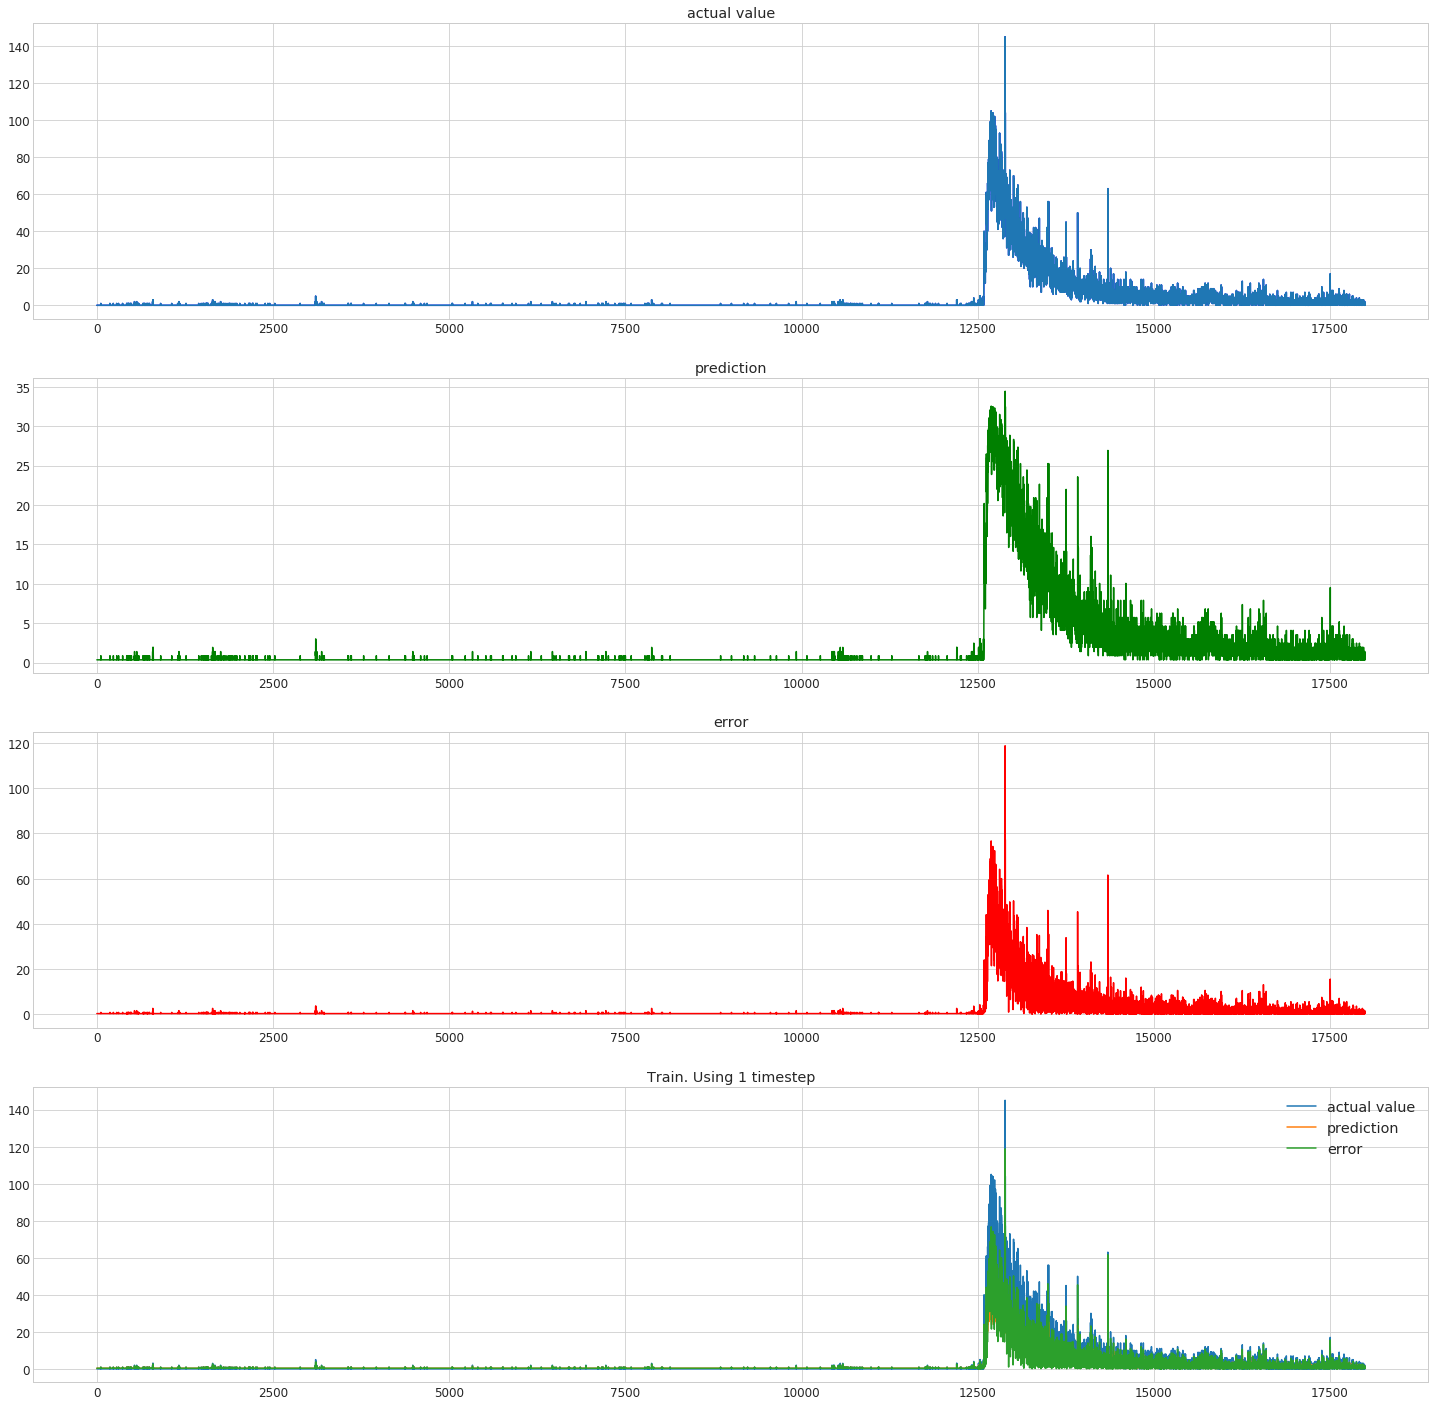

In [28]:
plt.figure(figsize=(25,25))
plt.subplot(411)
plt.plot(train_true, 'b-', label= 'actual value')
plt.title("actual value")
plt.plot(train_true,label='actual value')

plt.subplot(412)
plt.plot(train_predictions[:,0], 'g-', label='prediction')
plt.title("prediction")

plt.subplot(413)
plt.plot(abs(train_true - train_predictions[:,0]),'r-',label='error')
plt.title("error")

plt.subplot(414)
plt.plot(train_true,label='actual value')
plt.plot(train_predictions[:,0],label='prediction')
plt.plot(abs(train_true - train_predictions[:,0]),label='error')
plt.legend()
plt.title("Train. Using 1 timestep")

plt.show()

2.062612534084311
6.237601250141211


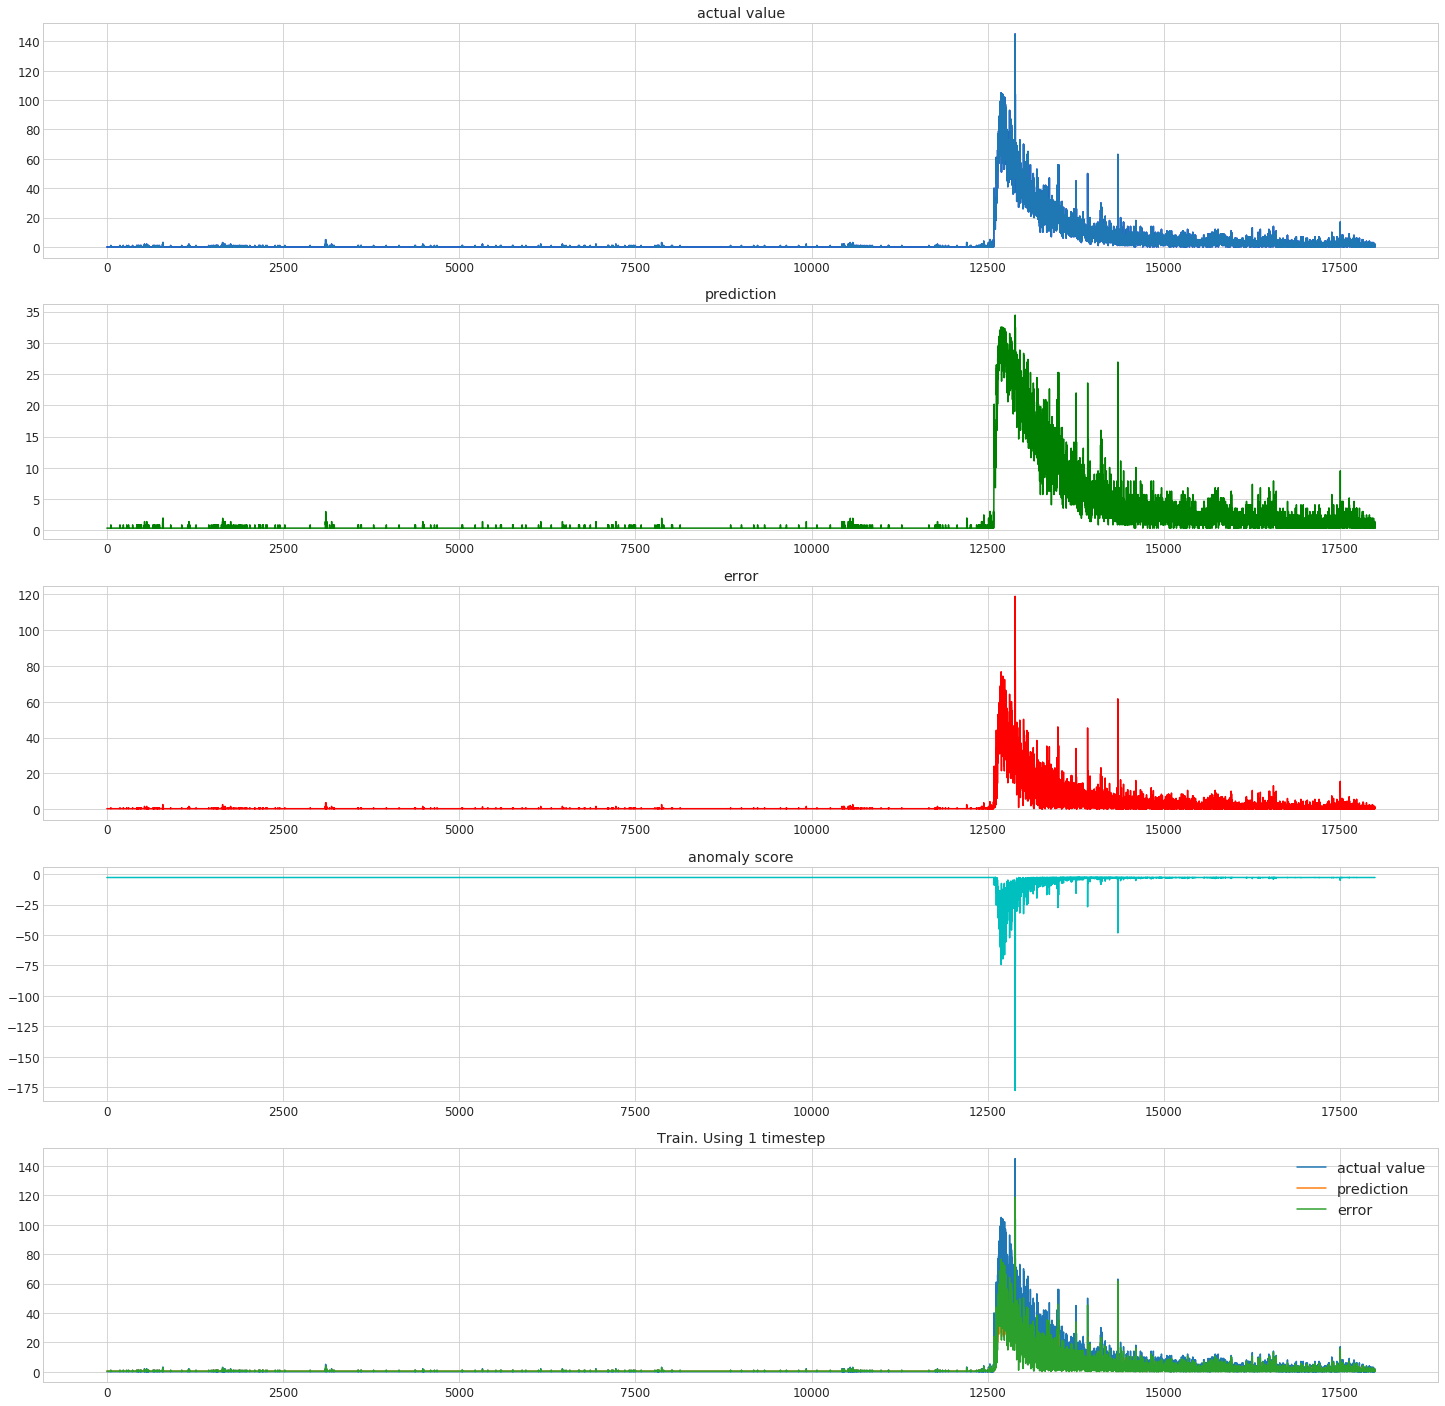

In [29]:
#error vectors
from scipy.stats import norm

train_error_vectors = np.zeros(np.shape(train_predictions))
n_cols = np.shape(train_predictions)[1]
for i in range(n_cols):
    train_error_vectors[:,i] =  np.abs(train_true -train_predictions[:,i])

#ERROR DIMENSION
error_dimension = 1
train_error_vectors = train_error_vectors[:,0:error_dimension]
mean = np.mean(train_error_vectors)
std = np.std(train_error_vectors)
print mean
print std
p_values= norm(loc=mean, scale=std).logpdf(train_error_vectors)

plt.figure(figsize=(25,25))
plt.subplot(511)
plt.plot(train_true, 'b-', label= 'actual value')
plt.title("actual value")
plt.plot(train_true,label='actual value')

plt.subplot(512)
plt.plot(train_predictions[:,0], 'g-', label='prediction')
plt.title("prediction")

plt.subplot(513)
plt.plot(abs(train_true - train_predictions[:,0]),'r-',label='error')
plt.title("error")

plt.subplot(515)
plt.plot(train_true,label='actual value')
plt.plot(train_predictions[:,0],label='prediction')
plt.plot(abs(train_true - train_predictions[:,0]),label='error')
plt.legend()
plt.title("Train. Using 1 timestep")

plt.subplot(514)
plt.plot(p_values,'c-')
plt.title("anomaly score")
plt.show()

train_errors_1 = train_true - train_predictions[:,0]

In [30]:
v2_error_vectors = np.zeros(np.shape(validation2_predictions))
for i in range(n_cols):
    v2_error_vectors[:,i] =  np.abs(validation2_true -validation2_predictions[:,i])

v2_error_vectors = v2_error_vectors[:,0:error_dimension]
v2_p_values= norm(loc=mean, scale=std).logpdf(v2_error_vectors)

print v2_p_values.shape
test_error_vectors = np.zeros(np.shape(test_predictions))
for i in range(n_cols):
    test_error_vectors[:,i] =  test_true -test_predictions[:,i]
test_error_vectors = test_error_vectors[:,0:error_dimension]
test_p_values= norm(loc=mean, scale=std).logpdf(test_error_vectors)
test_true_anomalies = np.where(test_labels[:,0]==1)

(19280, 1)


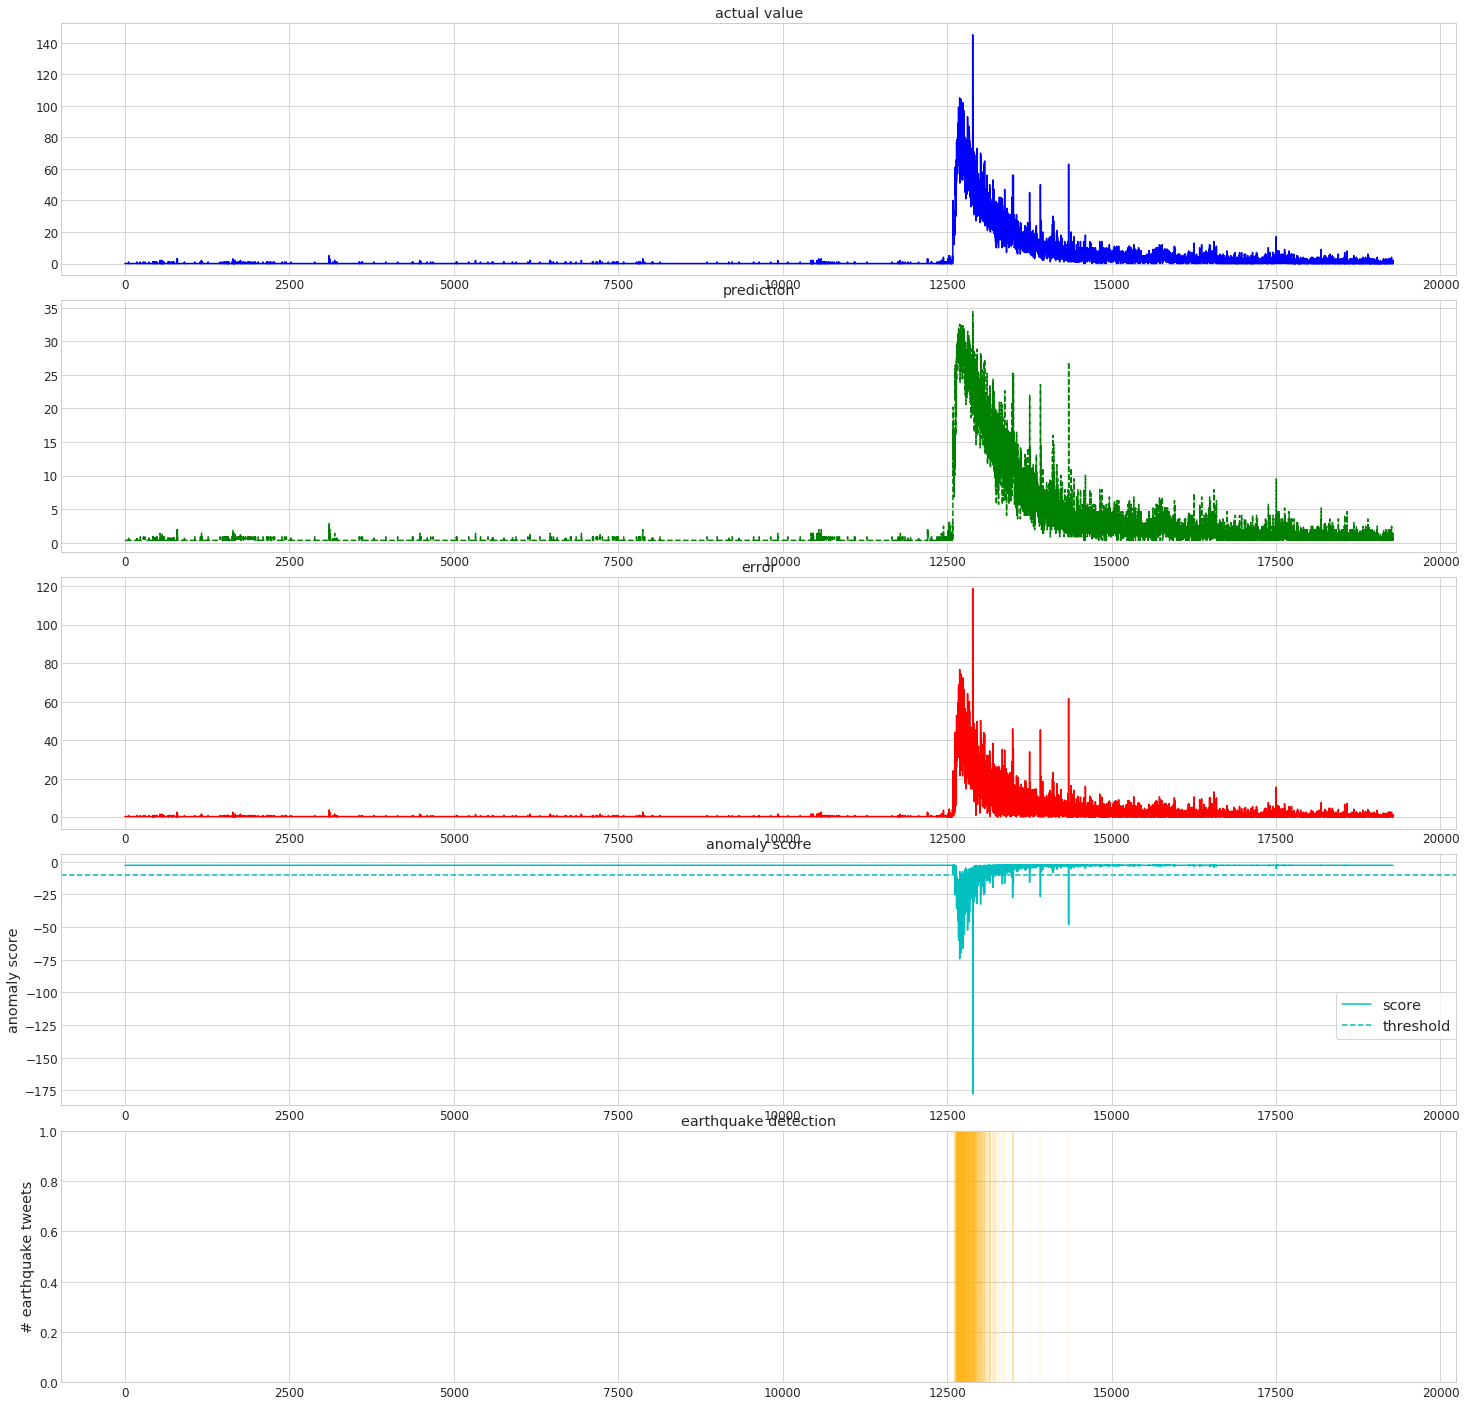

In [32]:
threshold_v2 = -10

f = plt.figure(figsize=(25,25))
plt.subplots_adjust(hspace=0.1)

v2_below_threshold = np.where(v2_p_values <= threshold_v2)

#print v2_below_threshold

ax1 = plt.subplot(511)
ax1.plot(validation2_true,label='actual value',color='b')
plt.title("actual value")

ax2 = plt.subplot(512,sharex=ax1)
ax2.plot(validation2_predictions[:,0],ls ='dashed',label='prediction',color='g')
plt.title("prediction")

ax3 = plt.subplot(513, sharex=ax1)
ax3.plot(abs(validation2_true - validation2_predictions[:,0]),label='error',color='r')
plt.title("error")

ax5 = plt.subplot(515, sharex=ax1)
for column in v2_below_threshold[0]:
    ax5.axvline(x=column,color=sns.xkcd_rgb["amber"],alpha=.1)
#for row in v2_true_anomalies:
#    plt.plot(row, validation2_true[row], 'r.', markersize=20.0)

plt.ylabel("# earthquake tweets")
plt.title("earthquake detection")


#plot v2 log PD
ax4 = plt.subplot(514, sharex=ax1)
ax4.plot(v2_p_values,label='score',color='c')
ax4.axhline(y=threshold_v2,ls='dashed',label='threshold',color='c')
ax4.legend(bbox_to_anchor=(1, .45), borderaxespad=0.,frameon=True)
plt.ylabel("anomaly score")
plt.title("anomaly score")

#Set up the xlabel and xtick
#xticklabels = ax1.get_xticklabels() + ax2.get_xticklabels()
# xticklabels = ax1.get_xticklabels()
# plt.setp(xticklabels, visible=False)
# plt.xlabel("time")
plt.show()
pp = PdfPages('earthquake4 tweets_v2.pdf')
pp.savefig(f)
pp.close()

[12622 12623 12625 12626 12627 12632 12637 12638 12640 12641 12642 12644
 12645 12646 12647 12648 12649 12650 12651 12652 12653 12654 12655 12656
 12657 12658 12659 12660 12661 12662 12663 12664 12665 12666 12667 12668
 12669 12670 12671 12672 12673 12674 12675 12676 12677 12678 12679 12680
 12681 12682 12683 12684 12685 12686 12687 12688 12689 12690 12691 12692
 12693 12694 12696 12697 12698 12699 12700 12701 12702 12703 12704 12705
 12706 12707 12708 12709 12710 12711 12712 12713 12714 12715 12716 12717
 12718 12719 12720 12721 12722 12723 12724 12725 12726 12727 12728 12730
 12731 12732 12733 12734]


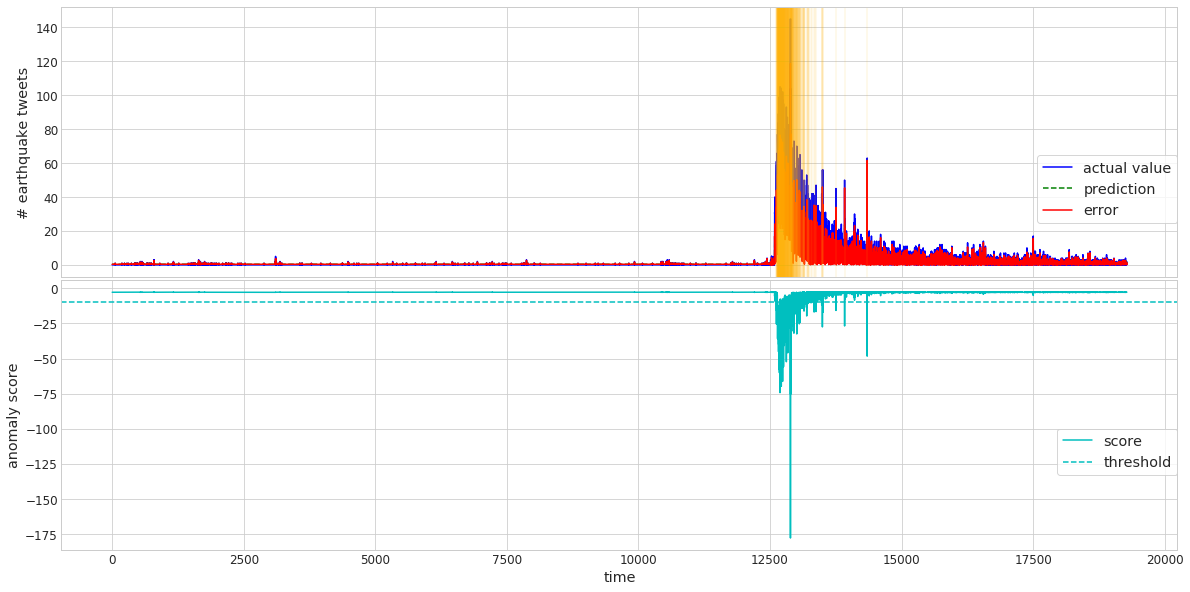

In [33]:
test_below_threshold = np.where(test_p_values <= threshold_v2)
print test_below_threshold[0][0:100]
#plot test data
f = plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.01)

ax1 = plt.subplot(211)
ax1.plot(test_true,label='actual value',color='b')
ax1.plot(test_predictions[:,0],ls ='dashed',label='prediction',color='g')
ax1.plot(abs(test_true - test_predictions[:,0]),label='error',color='r')
for column in test_below_threshold[0]:
    ax1.axvline(x=column,color=sns.xkcd_rgb["amber"],alpha=0.1)
#for row in test_true_anomalies:
#    plt.plot(row, test_true[row], 'r.', markersize=20.0)
ax1.legend(bbox_to_anchor=(1, .45), borderaxespad=0.,frameon=True)
plt.ylabel("# earthquake tweets")
#plt.title("Test. Using 1 timestep")

ax2 = plt.subplot(212, sharex=ax1)
ax2.plot(test_p_values,label='score',color='c')
ax2.axhline(y=threshold_v2,ls='dashed',label='threshold',color='c')
ax2.legend(bbox_to_anchor=(1, .45), borderaxespad=0.,frameon=True)
plt.ylabel("anomaly score")
#plt.title("test p-values")

#Set up the xlabel and xtick
#xticklabels = ax1.get_xticklabels() + ax2.get_xticklabels()
xticklabels = ax1.get_xticklabels()
plt.setp(xticklabels, visible=False)
plt.xlabel("time")
plt.show()
pp = PdfPages('Earthquake_test.pdf')
pp.savefig(f)
pp.close()

In [35]:
df = pd.read_csv("../resources/data/earthquake/Earthquake6/"+input_data,header=None,names=['col0','col1','col2'],sep=",")

In [36]:
df['col1'][12622]

'12/25/2016 14:34:23'

In [ ]:
# FINISH NOTEBOOK